In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv (r'C://at17DB//ca-2004-01.csv', sep = ';')

In [5]:
df

,Regiao,Sigla,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data_da_Coleta,Valor_de_Venda,Valor_de_Compra,Unidade_de_Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281526,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,GASOLINA,28/06/2004,"2,2","1,89",R$ / litro,PETROBAHIA
281527,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,ETANOL,28/06/2004,"1,48",NaN,R$ / litro,PETROBAHIA
281528,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,DIESEL,28/06/2004,"1,41","1,32",R$ / litro,PETROBAHIA
281529,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO 5 DE FEVEREIRO LTDA,02.125.226/0001-44,PRACA CORONEL ZEZINHO TANAJURA,1,COMODO,CENTRO,46140-000,ETANOL,28/06/2004,"1,49","0,6909",R$ / litro,PETROBAHIA


In [6]:
df['Data_da_Coleta'] = pd.to_datetime(df['Data_da_Coleta'], format = ('%d/%m/%Y'))

In [7]:
df['Valor_de_Venda'] = df['Valor_de_Venda'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [ ]:
df['Valor_de_Compra'] = df['Valor_de_Compra'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [8]:
df['Rua'] = df['Rua'].apply(lambda x: str(x.replace("","").replace("'","")))
df['Revenda'] = df['Revenda'].apply(lambda y: str(y.replace("","").replace("'","")))
df['Municipio'] = df['Municipio'].apply(lambda b: str(b.replace("","").replace("'","")))
df['Bandeira'] = df['Bandeira'].apply(lambda b: str(b.replace("","").replace("'","")))

In [9]:
print("Processo de carga dos dados no BD Iniciando!")
print(datetime.today())

Processo de carga dos dados no BD Iniciando!
2022-05-02 11:50:38.541379


In [10]:
print("+++ PROCESSO FINALIZADO COM SUCESSO +++")
print(datetime.today())
print()

+++ PROCESSO FINALIZADO COM SUCESSO +++
2022-05-02 11:54:54.003047



In [11]:
# Extração de dados da entidade Postos
print(f"Data inicial da coleta: ", df['Data_da_Coleta'].min())
print(f"Data final da coleta: ", df['Data_da_Coleta'].max())
print()

Data inicial da coleta:  2004-05-10 00:00:00
Data final da coleta:  2004-06-30 00:00:00



In [12]:
# Extração de dados agrupados por Região
print(df.groupby(['Regiao']).agg({'Valor_de_Venda':'sum'}))
print()

        Valor_de_Venda
Regiao                
CO          34171.4170
N           24236.8950
NE          73578.7930
S           74290.0890
SE         223236.4745



In [13]:
# Criação do gráfico de barras
regiao = ["CO","N","NE","S","SE"]
valores = [24695.97,17487.72,48192.36,49785.24,160863.21]

Text(0.5, 0, 'Regiões')

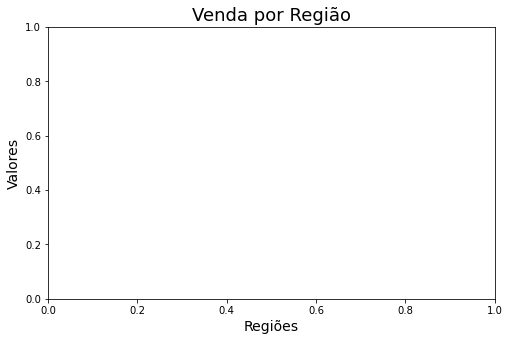

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Venda por Região',fontsize=18)
ax.set_ylabel('Valores',fontsize=14)
ax.set_xlabel('Regiões',fontsize=14)

In [15]:
for idx, val in enumerate(valores):
  txt = f'{val}'
  y_coord = val + 5
  x_coord = idx - 0.3

In [16]:
ax.text(x=x_coord, y=y_coord, s=txt, fontsize=10)

Text(3.7, 160868.21, '160863.21')

In [17]:
ax.bar(regiao, valores, color=['green','yellow','blue','orange','red'])   
plt.show()

In [19]:
# Extração de dados demonstranto o lucro
print("O lucro obtido neste período foi de: ")
print("df['Valor_de_Venda'].sum()" - "df['Valor_de_Compra'].sum()")

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_11036/2383004510.py, line 3)

In [20]:
df['Valor_de_Venda'].sum()

429513.6685

In [21]:
df['Valor_de_Compra'].sum()

TypeError: can only concatenate str (not "int") to str

In [ ]:
print(df['Valor_de_Venda'].sum() - df['Valor_de_Compra'].sum())